In [3]:
# Pagrindinės bibliotekos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Vizualizacijai, atkreipkite dėmesį, kad naudojame "matplotlib" pagrindu
import warnings
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import sqlite3

# Duomenų modeliavimas ir analizė
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Darbas su interneto naršyklėmis per Selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Įspėjimų ignoravimas
warnings.filterwarnings('ignore')

# Specializuoti moduliai
from numpy.polynomial import Polynomial

import json
from sklearn.preprocessing import StandardScaler

In [25]:
SDB = sqlite3.connect('AutopliusDuombaze10.db')
sql = "SELECT * FROM Autoplius;"
df = pd.read_sql_query(sql, con=SDB)
df2 = df[['gamintojas', 'amzius', 'kuras', 'rida', 'galia', 'kaina']]
df2.columns = ['G', 'PR', 'KT', 'R', 'V', 'E']

df2.replace('Nėra', pd.NA, inplace=True)
df2.dropna(inplace=True)
df = df2
df

,G,PR,KT,R,V,E
0,Nissan,2018,Benzinas,53500,1197,16900
1,BMW,2015,Benzinas,199000,1997,18000
2,Jaguar,2018,Elektra,0,400,21900
3,Porsche,2004,Benzinas,259000,4500,5650
4,Fiat,2016,Benzinas / dujos,126211,2360,10500
...,...,...,...,...,...,...
618,Mercedes-Benz,2009,Dyzelinas,350000,2200,4000
619,Audi,2007,Dyzelinas,253997,2000,4000
620,Chrysler,2011,Benzinas,96719,3604,4050
621,Ford,2012,Benzinas,174000,998,4100


In [26]:
from sklearn.preprocessing import LabelEncoder

gamLE = LabelEncoder()
ktLE = LabelEncoder()
gamLE.fit(df['G'])
df['G'] = gamLE.transform(df['G'])
ktLE.fit(df['KT'])
df['KT'] = ktLE.transform(df['KT'])
df

,G,PR,KT,R,V,E
0,24,2018,0,53500,1197,16900
1,2,2015,0,199000,1997,18000
2,13,2018,6,0,400,21900
3,27,2004,0,259000,4500,5650
4,8,2016,1,126211,2360,10500
...,...,...,...,...,...,...
618,21,2009,4,350000,2200,4000
619,1,2007,4,253997,2000,4000
620,4,2011,0,96719,3604,4050
621,9,2012,0,174000,998,4100


In [27]:
Y_target = df['E']
X_features = df.drop(columns=['E'])

X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.15, random_state=0)  #4 sarasai 


In [28]:
scaler = StandardScaler()
scaler.fit(X_train[['PR','R','V']])
X_train_scaled = scaler.transform(X_train[['PR','R','V']]); X_train_scaled

array([[-0.43861901,  0.22711367, -1.21592871],
       [-0.60729119,  0.03819934, -0.4922368 ],
       [-0.43861901,  0.74662808, -0.1036677 ],
       ...,
       [-0.94463557, -1.42588674, -0.20189335],
       [-0.43861901, -0.28452931, -0.63524179],
       [ 1.58544723, -1.42588674, -0.05744386]])

In [29]:
PR_sc, R_sc, V_sc = zip(*X_train_scaled)
X_train['PR'] = PR_sc
X_train['R'] = R_sc
X_train['V'] = V_sc ; X_train

,G,PR,KT,R,V
356,34,-0.438619,0,0.227114,-1.215929
336,21,-0.607291,0,0.038199,-0.492237
389,34,-0.438619,4,0.746628,-0.103668
468,34,-0.269947,4,0.549842,-0.103668
455,2,-0.775963,0,0.630690,-0.057444
...,...,...,...,...,...
74,33,1.248103,0,-1.425887,-0.638131
304,27,1.585447,0,-0.874887,1.379828
10,34,-0.944636,4,-1.425887,-0.201893
406,26,-0.438619,0,-0.284529,-0.635242


In [30]:
np.std(X_train_scaled)

np.float64(1.0)

In [32]:
np.mean(X_train_scaled)

np.float64(1.833315427273902e-15)

In [33]:
# Apmokinome X_train
# Dabar su standart Scaler rescaliname X_test:
X_test_scaled = scaler.transform(X_test[['PR','R','V']]); X_test_scaled

array([[ 0.40474193,  0.75875796,  1.37982848],
       [-0.43861901,  0.08542792,  0.27623444],
       [ 1.75411942, -0.94144742, -2.72975928],
       [-0.26994682,  0.93554242,  0.46257427],
       [-0.60729119,  0.14839936, -0.20767132],
       [-0.43861901,  1.01425672, -0.1874484 ],
       [ 0.06739755, -1.42588674, -2.9464335 ],
       [-0.77596338,  1.58099972, -0.06466634],
       [ 0.57341411,  0.46325658, -1.2173732 ],
       [ 0.23606974,  0.72398198, -0.05744386],
       [ 0.7420863 ,  0.72773665, -0.1022232 ],
       [-0.60729119,  0.04607077, -0.9385857 ],
       [-1.28197994,  1.32128187,  3.07999888],
       [-0.43861901,  1.10084246,  0.2314551 ],
       [ 1.58544723, -1.00870092, -1.2188177 ],
       [ 0.91075849, -0.41991792,  1.35671656],
       [ 0.40474193,  1.05361387, -0.06177735],
       [ 0.06739755, -1.18974382, -2.31085578],
       [ 0.40474193,  0.29795654,  1.33938263],
       [-0.60729119,  0.38454228, -0.1036677 ],
       [-0.77596338,  0.93554242,  0.231

In [34]:
PR_sc, R_sc, V_sc = zip(*X_test_scaled)
X_test['PR'] = PR_sc
X_test['R'] = R_sc
X_test['V'] = V_sc ; X_test

,G,PR,KT,R,V
170,1,0.404742,4,0.758758,1.379828
548,33,-0.438619,4,0.085428,0.276234
228,24,1.754119,6,-0.941447,-2.729759
398,23,-0.269947,0,0.935542,0.462574
534,34,-0.607291,4,0.148399,-0.207671
...,...,...,...,...,...
598,8,-0.269947,4,0.864700,-0.187448
156,9,1.585447,4,-0.494539,-0.781136
93,27,0.910758,4,-0.748944,1.339383
275,30,1.585447,4,-1.425887,-0.057444


In [35]:
linearML = LinearRegression() # lininis modelis
linearML.fit(X_train, y_train) # apmokinimas

LinearRegression()

In [36]:
y_predicted = linearML.predict(X_test)

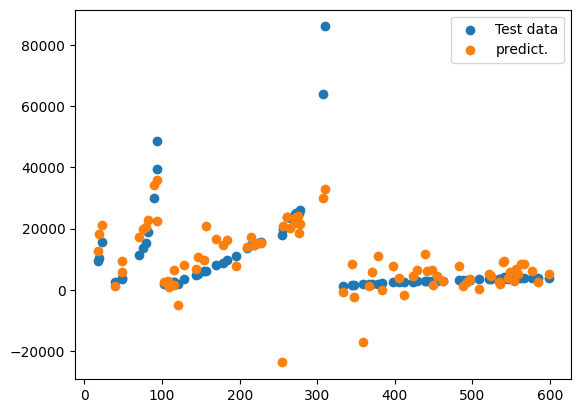

In [37]:
fig, ax = plt.subplots()
ax.scatter(X_test.index, y_test, label='Test data')
ax.scatter(X_test.index, y_predicted, label='predict.')
ax.legend(loc='best')
plt.show()

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
r2_score(y_test, y_predicted)

0.5064147357204649

In [40]:
mean_squared_error(y_test, y_predicted)

94095467.27123302

In [41]:
rmse = mean_squared_error(y_test, y_predicted)**(1/2)
rmse

9700.281814011025